# 数据处理模板

## 预设

### 导入库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from utils import *

### 全局参数

In [2]:
DictionaryFilePath = 'data/西安城市形象编码词表.pkl'
DataFilePath = 'data/西安城市形象数据_关键词_分类.pkl'

### 全局设置

In [3]:
# 支持中文
print(matplotlib.matplotlib_fname())
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    if 'Song' in i:
        print(i)
plt.rcParams['font.sans-serif'] = ['Songti SC'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 显示清晰
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/zack/.pyenv/versions/3.11.0/envs/NLP_Basic/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
Songti SC


## 函数工具

In [41]:
def auto_label(rect_group, ax):
    """Attach a text label above each bar in *rect_group*, displaying its height."""
    for rect in rect_group:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

## 数据读取

In [4]:
dictionary_comparison_table = pd.read_pickle(DictionaryFilePath)
data = pd.read_pickle(DataFilePath)
# data = data.sample(10).reset_index(drop=True)
# data.shape

In [60]:
data_classified = data[data['议题关键词分类']!=''].reset_index(drop=True)

In [5]:
dictionary_comparison_table_topic = dictionary_comparison_table.drop(['积极判断框架','消极判断框架','事件框架','细节框架'], axis=1)
dictionary_comparison_table_narration = dictionary_comparison_table[['积极判断框架','消极判断框架','事件框架','细节框架']]

## 数据分析

### 框架分布及变化趋势

#### 框架分布统计描述

In [34]:
# 总数统计
dictionary_statistics_topic = data[['议题关键词分类','内容']].groupby('议题关键词分类').agg('count')
dictionary_statistics_narration = data[['叙事关键词分类','内容']].groupby('叙事关键词分类').agg('count')

In [36]:
dictionary_statistics_topic = dictionary_statistics_topic.iloc[1:,:]
dictionary_statistics_narration = dictionary_statistics_narration.iloc[1:,:]

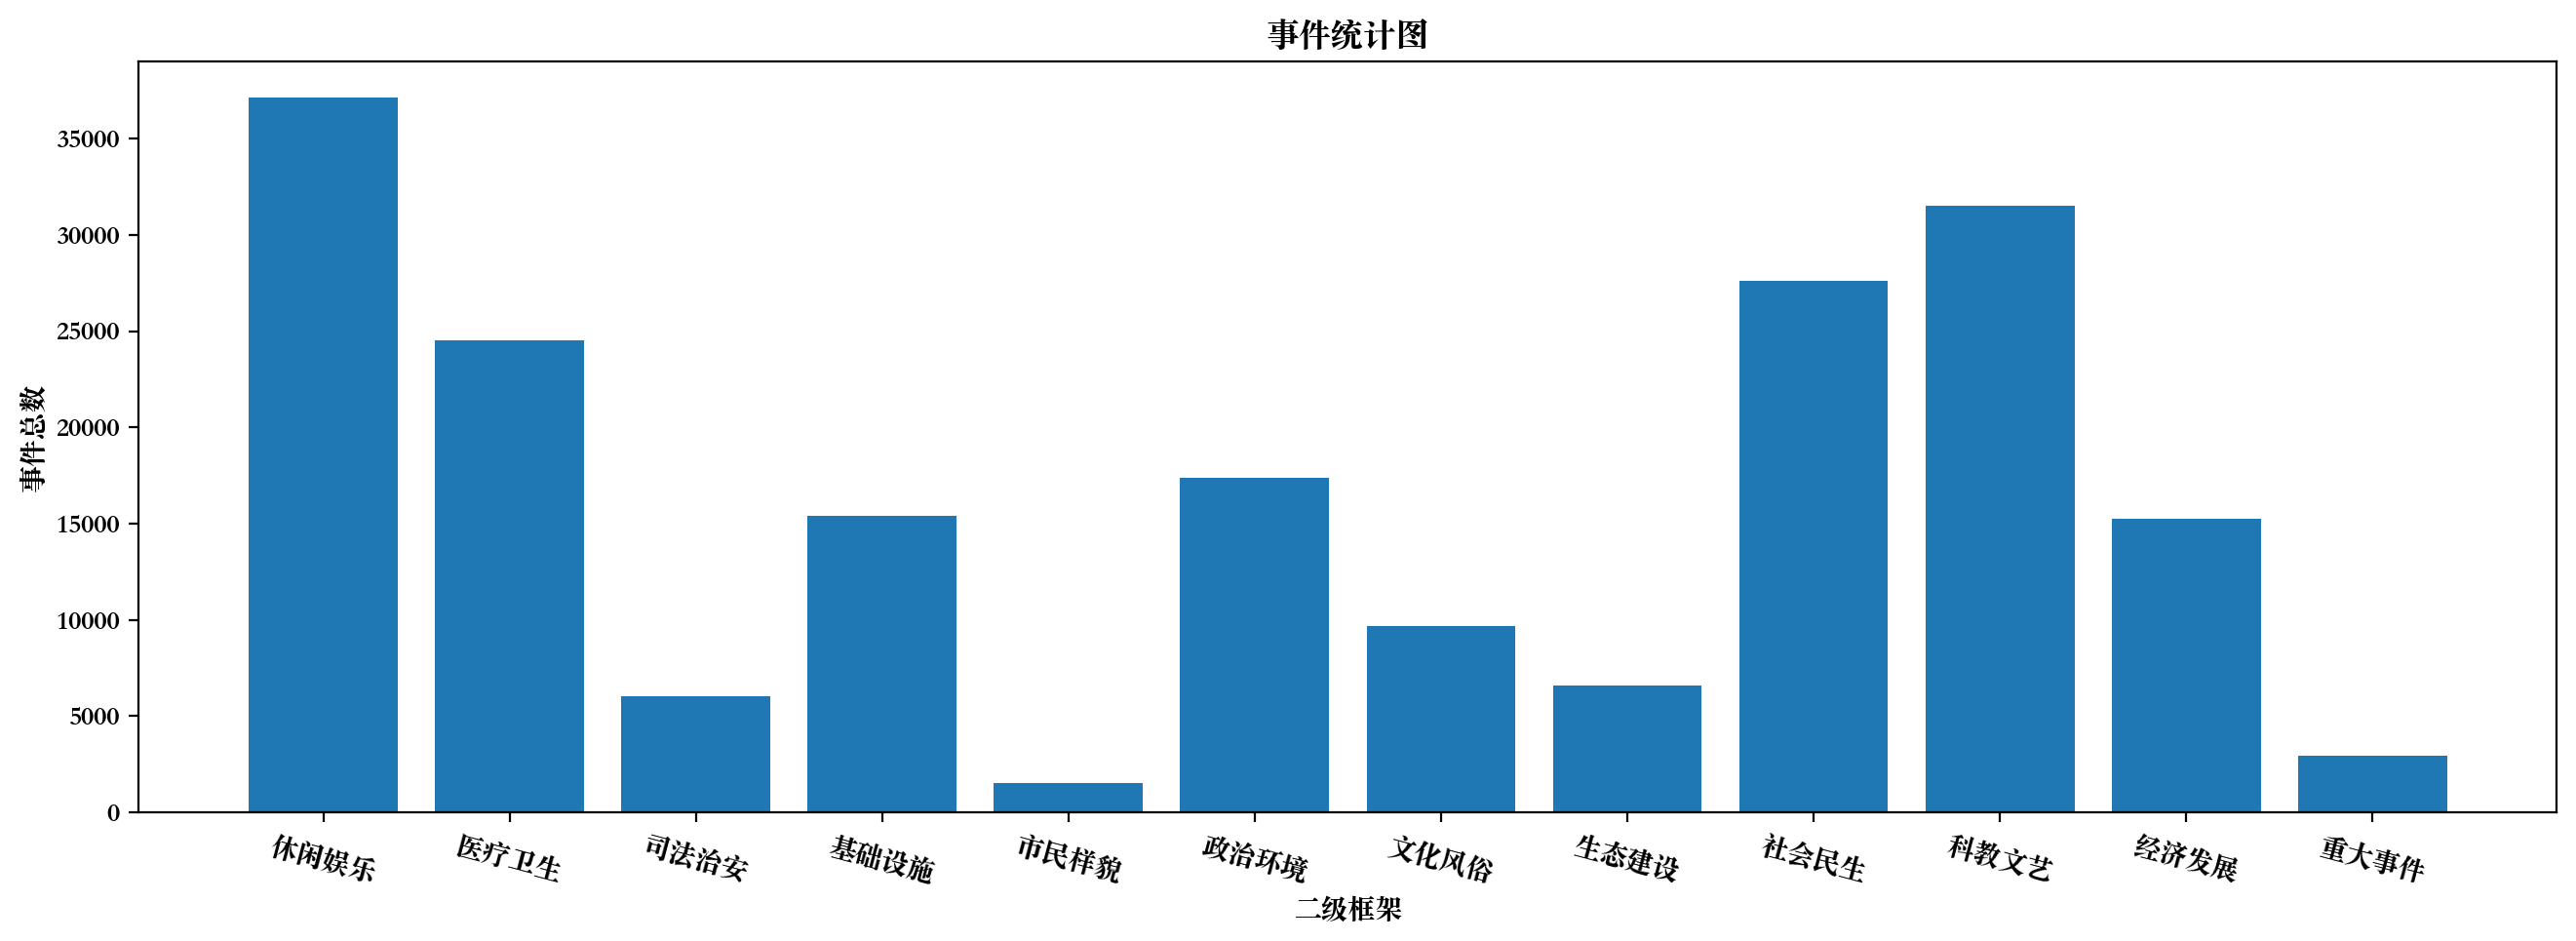

In [43]:
df_to_show = dictionary_statistics_topic
fig, ax = plt.subplots(figsize=(16, 5))
labels = df_to_show.index
counts = df_to_show['内容']
ax.bar(labels, counts)
ax.set_xlabel('二级框架')
ax.set_ylabel('事件总数')
ax.set_title('事件统计图')
plt.xticks(rotation=-15)    # 设置x轴标签旋转角度
plt.show()

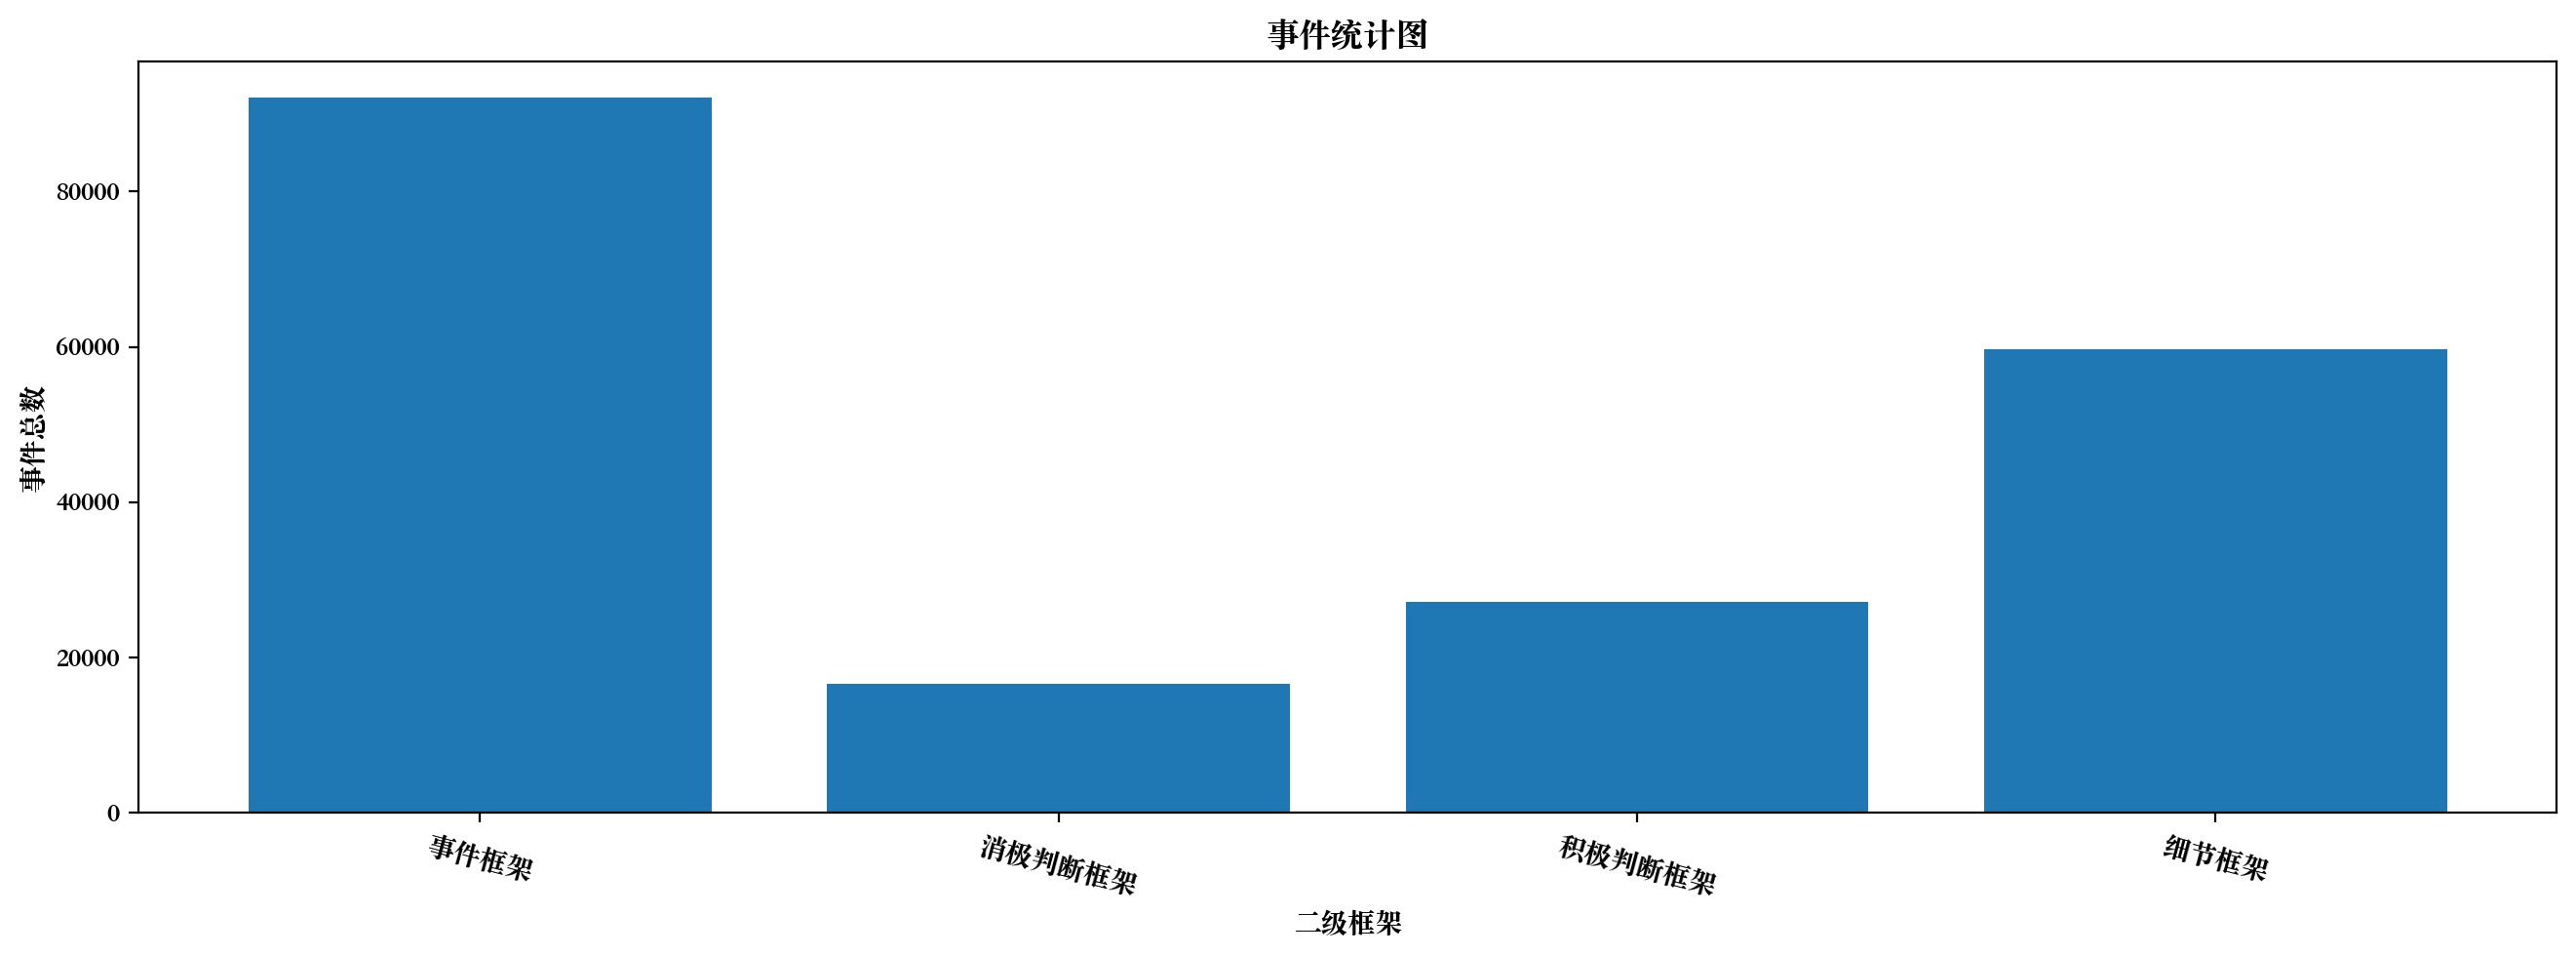

In [40]:
df_to_show = dictionary_statistics_narration
fig, ax = plt.subplots(figsize=(16, 5))
labels = df_to_show.index
counts = df_to_show['内容']
ax.bar(labels, counts)
ax.set_xlabel('二级框架')
ax.set_ylabel('事件总数')
ax.set_title('事件统计图')
plt.xticks(rotation=-15)    # 设置x轴标签旋转角度
plt.show()

In [44]:
# 数据保存
dictionary_statistics_topic.to_excel('res/议题分布数量统计.xlsx')
dictionary_statistics_narration.to_excel('res/叙事分布数量统计.xlsx')

#### 框架分布随时间变化折线图

In [51]:
period_data_topic = pd.DataFrame()
for v in dictionary_comparison_table_topic.columns:
    period_data_topic[f'{v}发布数'] = get_app_group_counts(data[data['议题关键词分类'] == v], '发布时间月份', app_name = None, column_name=f'{v}发布数', is_fill_zero=True)

In [48]:
period_data_narration = pd.DataFrame()
for v in dictionary_comparison_table_narration.columns:
    period_data_narration[f'{v}发布数'] = get_app_group_counts(data[data['叙事关键词分类'] == v], '发布时间月份', app_name = None, column_name=f'{v}发布数', is_fill_zero=True)

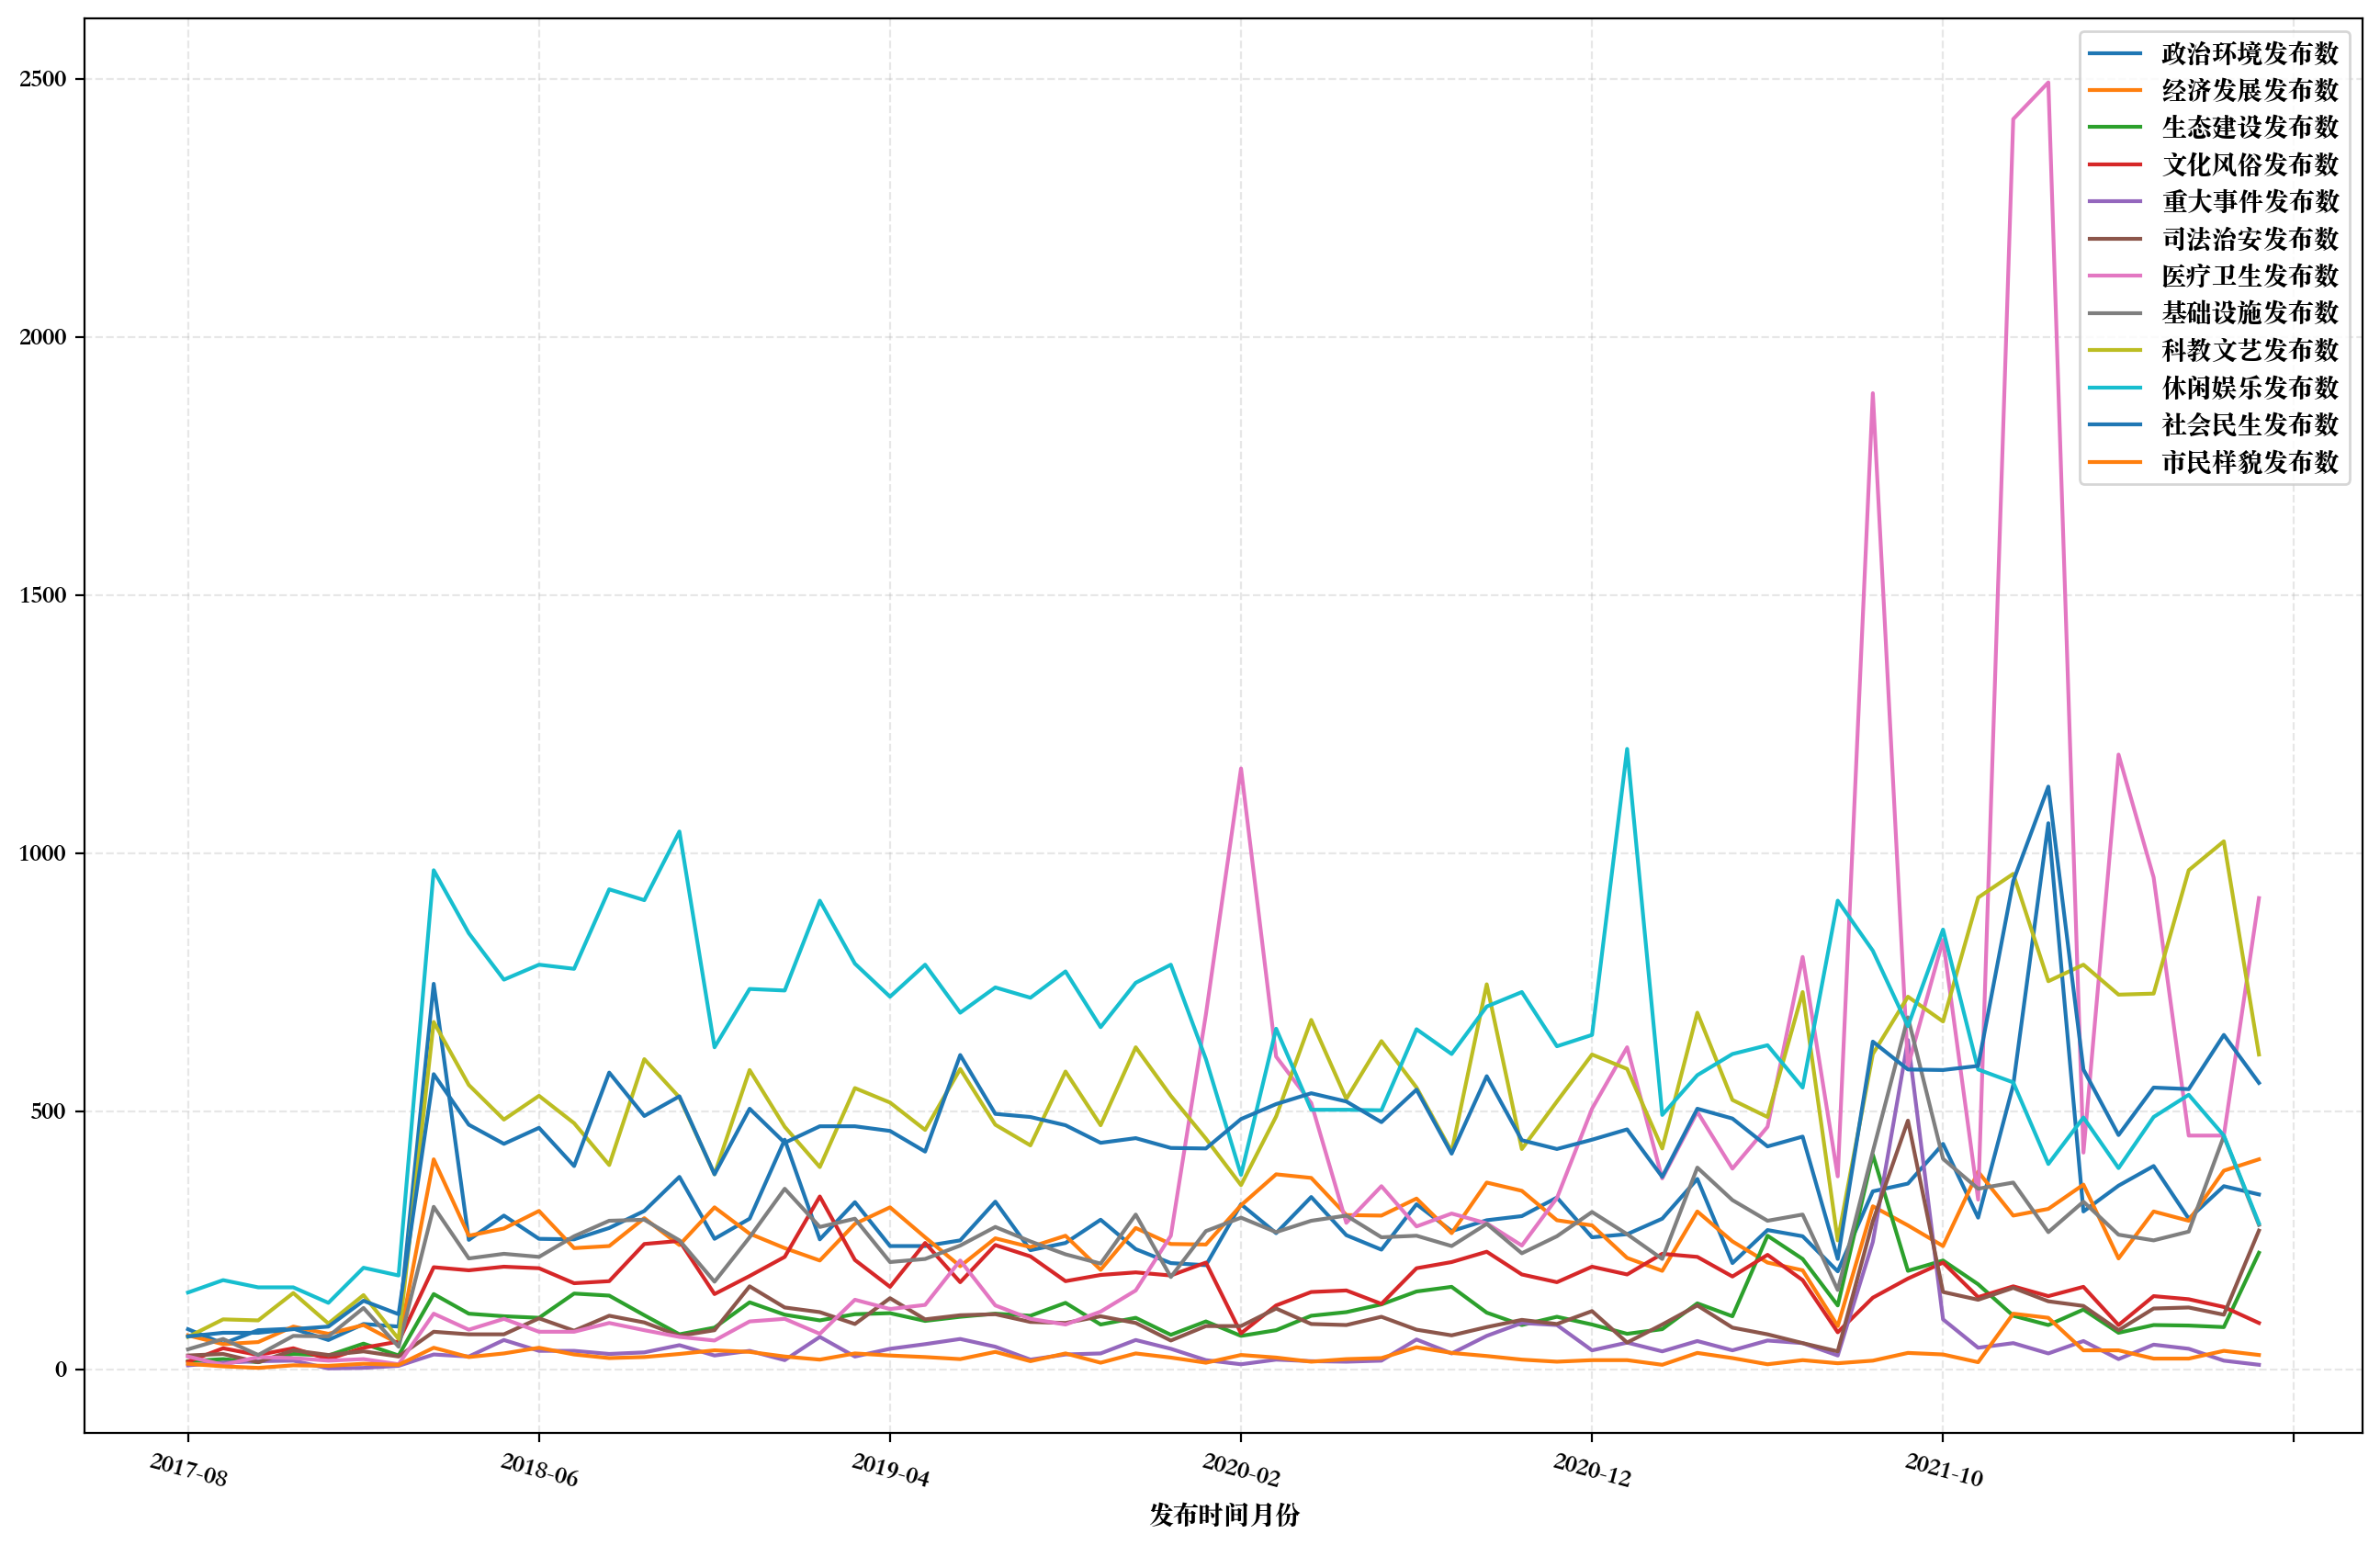

In [47]:
df_to_show = period_data_topic
ax = df_to_show.plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
plt.xticks(rotation=-15) 
plt.show()

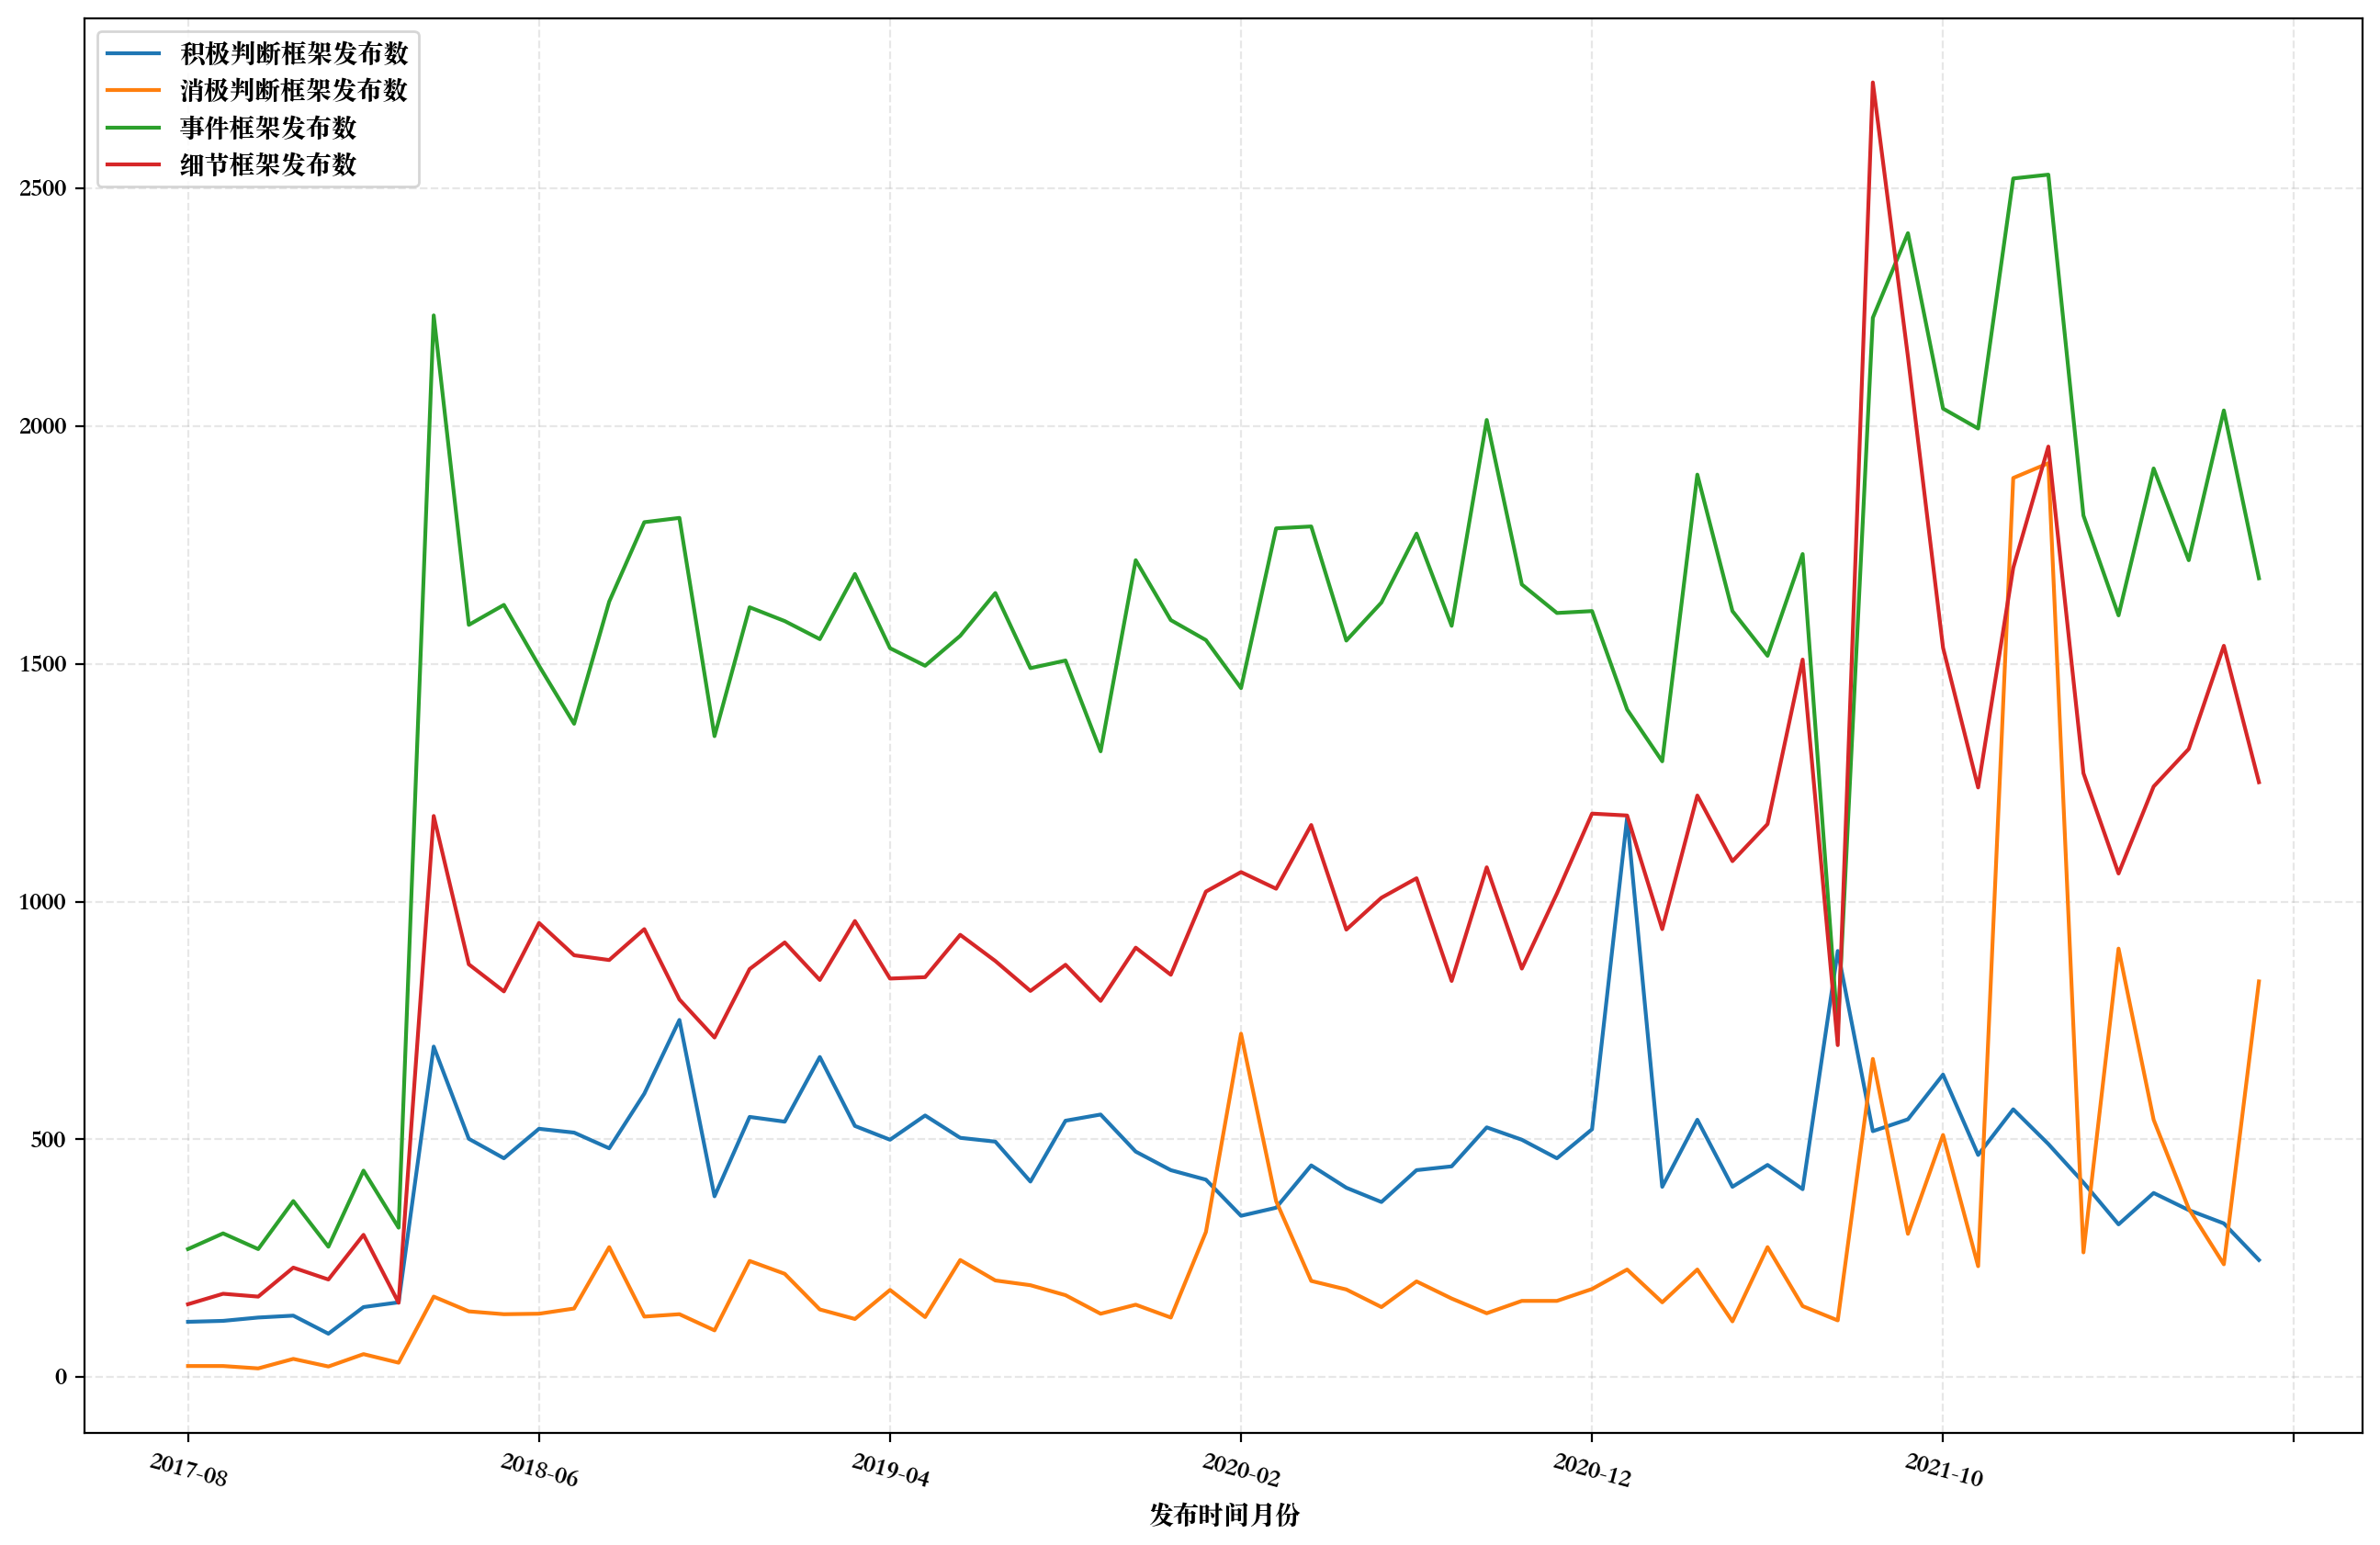

In [49]:
df_to_show = period_data_narration
ax = df_to_show.plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
plt.xticks(rotation=-15) 
plt.show()

In [53]:
period_data_topic['总发布数'] = get_app_group_counts(data, '发布时间月份', app_name = None, column_name='总发布数', is_fill_zero=True)
period_data_topic.to_excel('res/议题发布时间分布.xlsx')

In [54]:
period_data_narration['总发布数'] = get_app_group_counts(data, '发布时间月份', app_name = None, column_name='总发布数', is_fill_zero=True)
period_data_narration.to_excel('res/叙事发布时间分布.xlsx')

### 框架特征

#### 不同议题、叙事框架选择 对应分析

In [62]:
data_correspondence_between_topic_and_narration_analysis_sample = data_classified[['议题关键词分类', '叙事关键词分类']].sample(40000)
data_correspondence_between_topic_and_narration_analysis_sample.to_csv('res/框架对应分析.csv')

#### 不同平台议题、叙述框架选择 对应分析&差异分析

In [71]:
data_correspondence_analysis_douban = data_classified[data_classified['平台']=='豆瓣']
data_correspondence_analysis_zhihu = data_classified[data_classified['平台']=='知乎']
data_correspondence_analysis_weibo = data_classified[data_classified['平台']=='微博'].sample(40000 - data_correspondence_analysis_zhihu.shape[0] - data_correspondence_analysis_douban.shape[0])
data_correspondence_analysis_sample = pd.concat([data_correspondence_analysis_douban, data_correspondence_analysis_zhihu, data_correspondence_analysis_weibo])

In [73]:
data_correspondence_between_source_and_frame_analysis_sample = data_correspondence_analysis_sample[['平台', '议题关键词分类', '叙事关键词分类']]
data_correspondence_between_source_and_frame_analysis_sample.to_csv('res/平台框架对应分析.csv')

### 框架效果

#### 议题框架叙述效果 差异分析

In [90]:
data_correspondence_between_vote_and_topic_analysis_sample = data_classified[['议题关键词分类', '点赞数']].sample(40000)
data_correspondence_between_vote_and_topic_analysis_sample.to_csv('res/议题效果对应分析.csv')

#### 叙事框架叙述效果 差异分析

In [91]:
data_correspondence_between_vote_and_narration_analysis_sample = data_classified[['叙事关键词分类', '点赞数']].sample(40000)
data_correspondence_between_vote_and_narration_analysis_sample.to_csv('res/叙事效果对应分析.csv')

### 补充分析

#### 平台-发布数时间分布统计

In [76]:
# 发布数统计（时间段）
data_time_count = pd.DataFrame()
data_time_count['总数'] = get_app_group_counts(data, '发布时间月份')
for app_name in ['豆瓣','知乎','微博']:
    data_time_count[app_name] = get_app_group_counts(data, '发布时间月份', app_name, is_fill_zero=True)

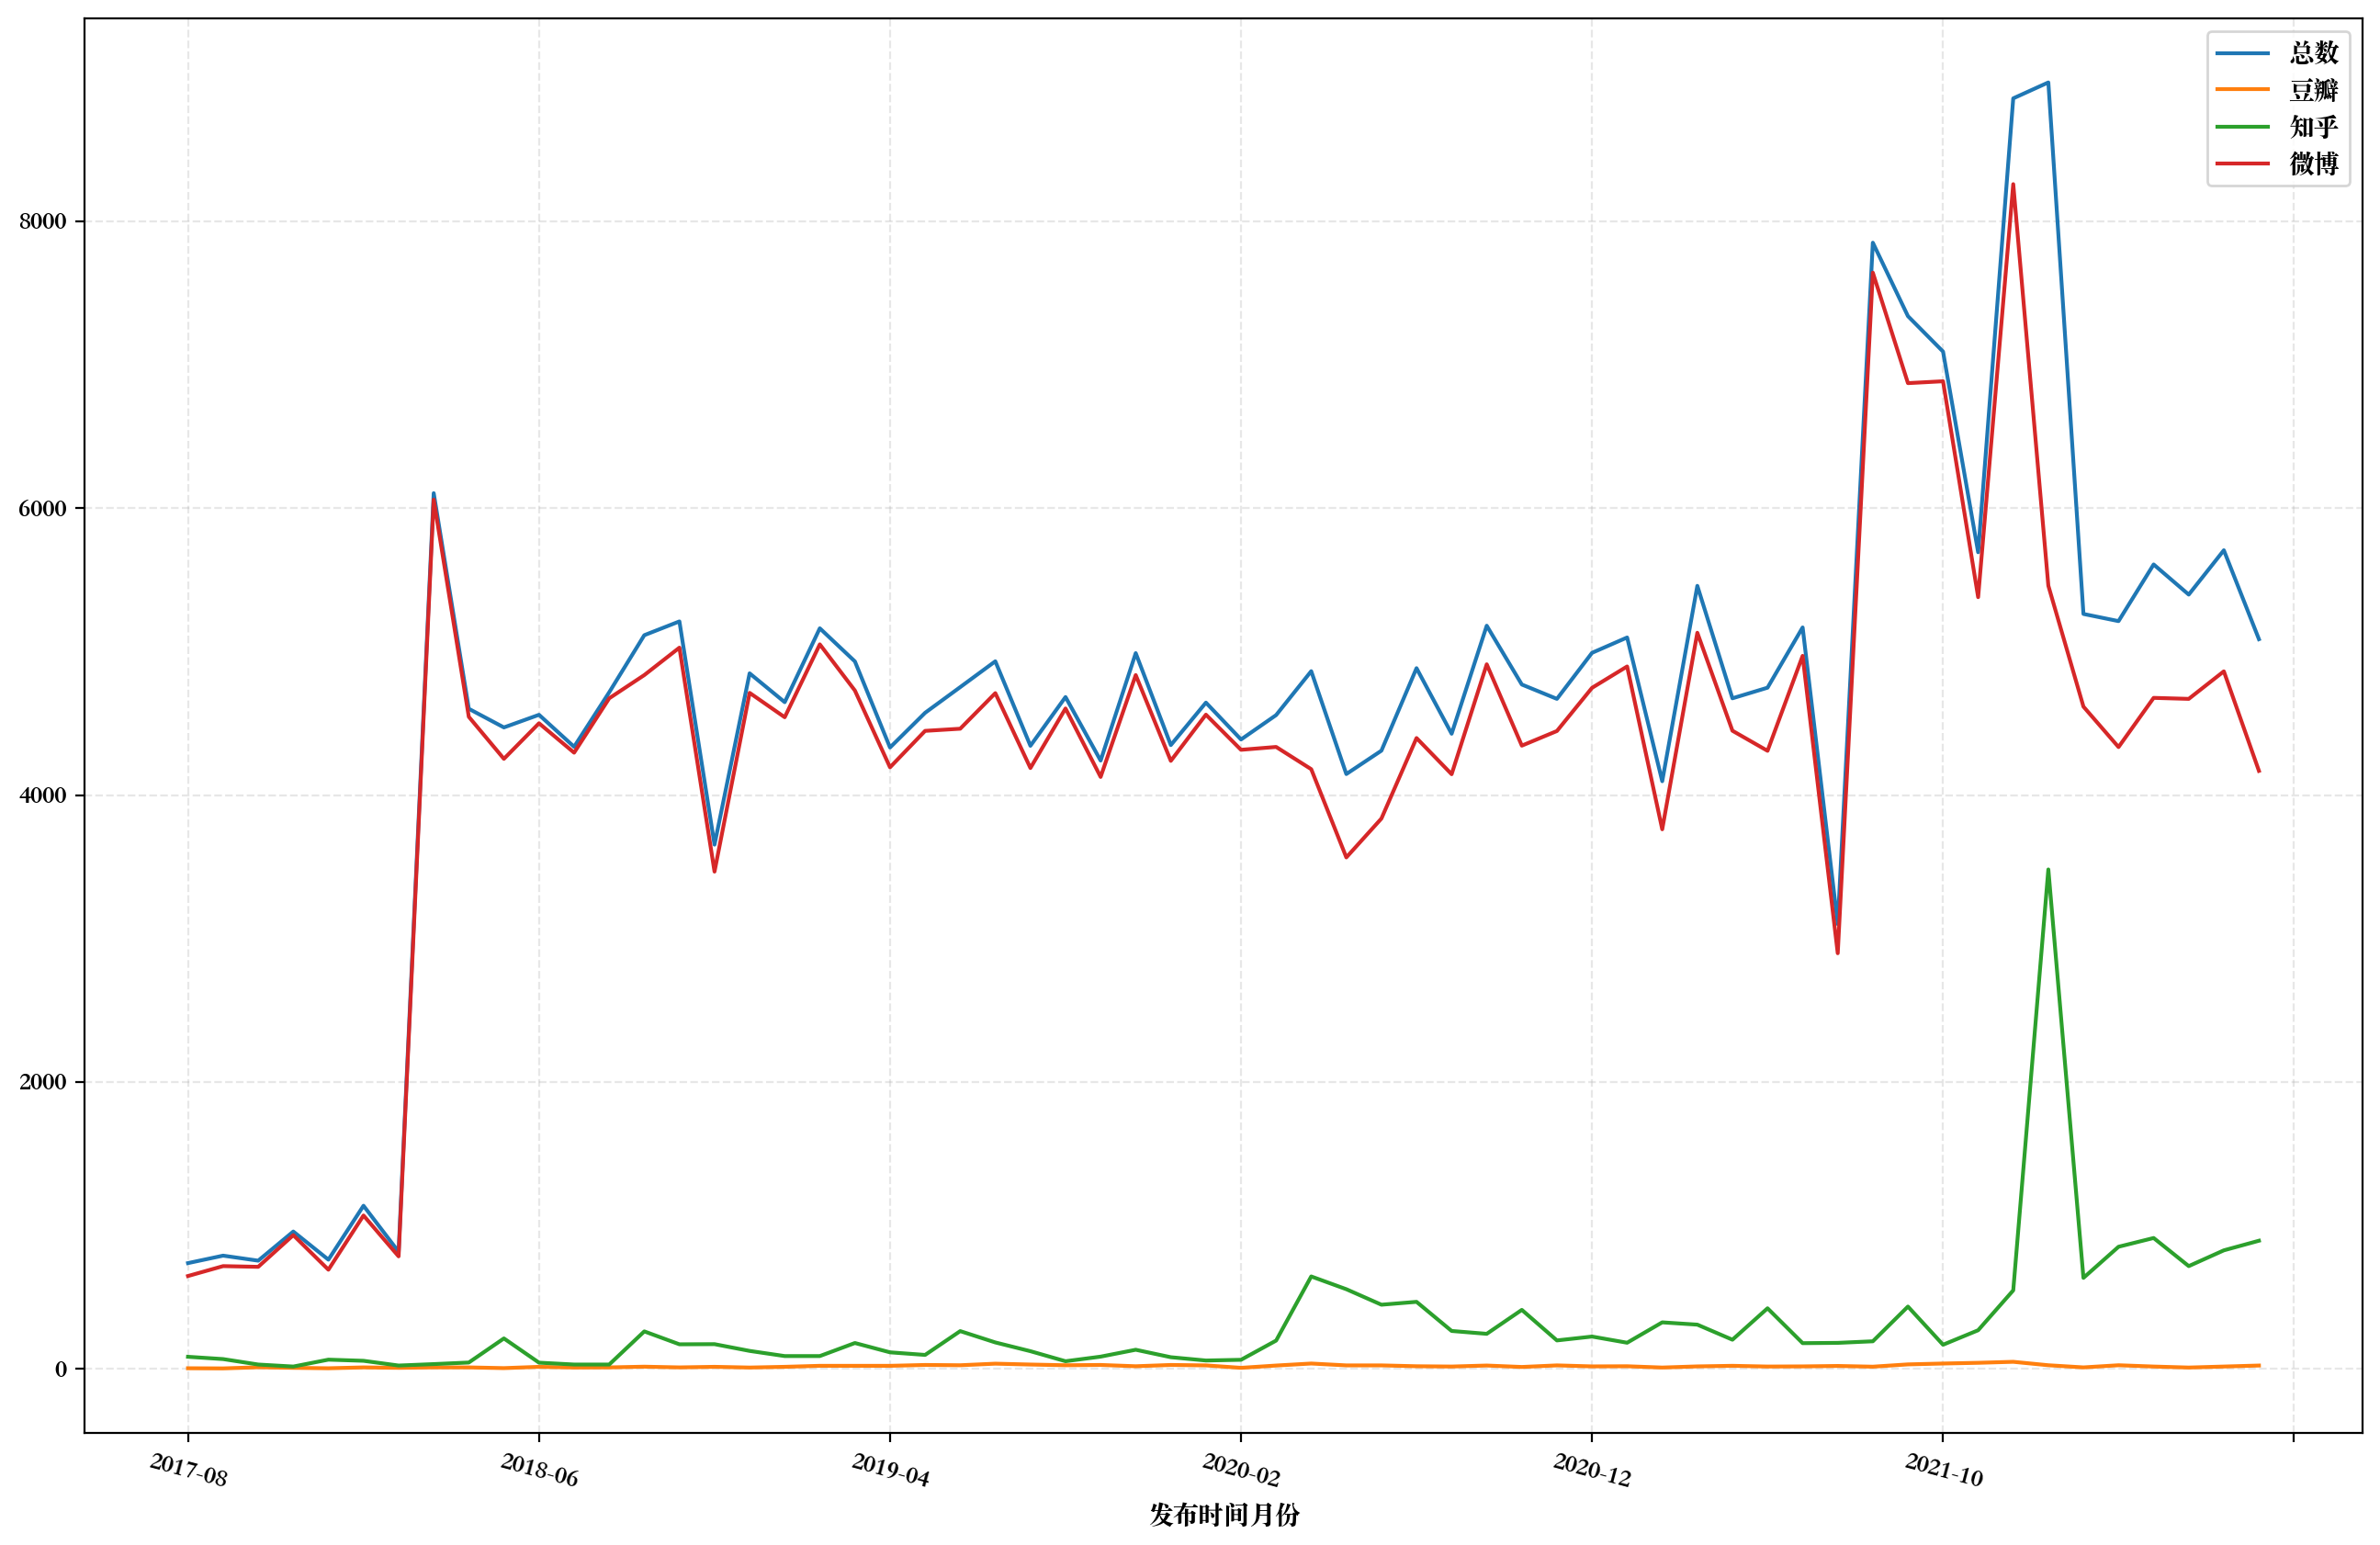

In [77]:
ax = data_time_count.loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
plt.xticks(rotation=-15) 
plt.show()

In [78]:
data_time_count[data_time_count['微博']>6000]

,总数,豆瓣,知乎,微博
发布时间月份,,,,
2018-03,6105,11,34,6060
2021-08,7851,16,193,7642
2021-09,7339,32,435,6872
2021-10,7092,38,169,6885
2021-12,8857,50,548,8259


In [79]:
dt = data_time_count[(data_time_count.index>='2021-06')&(data_time_count.index<='2022-05')]

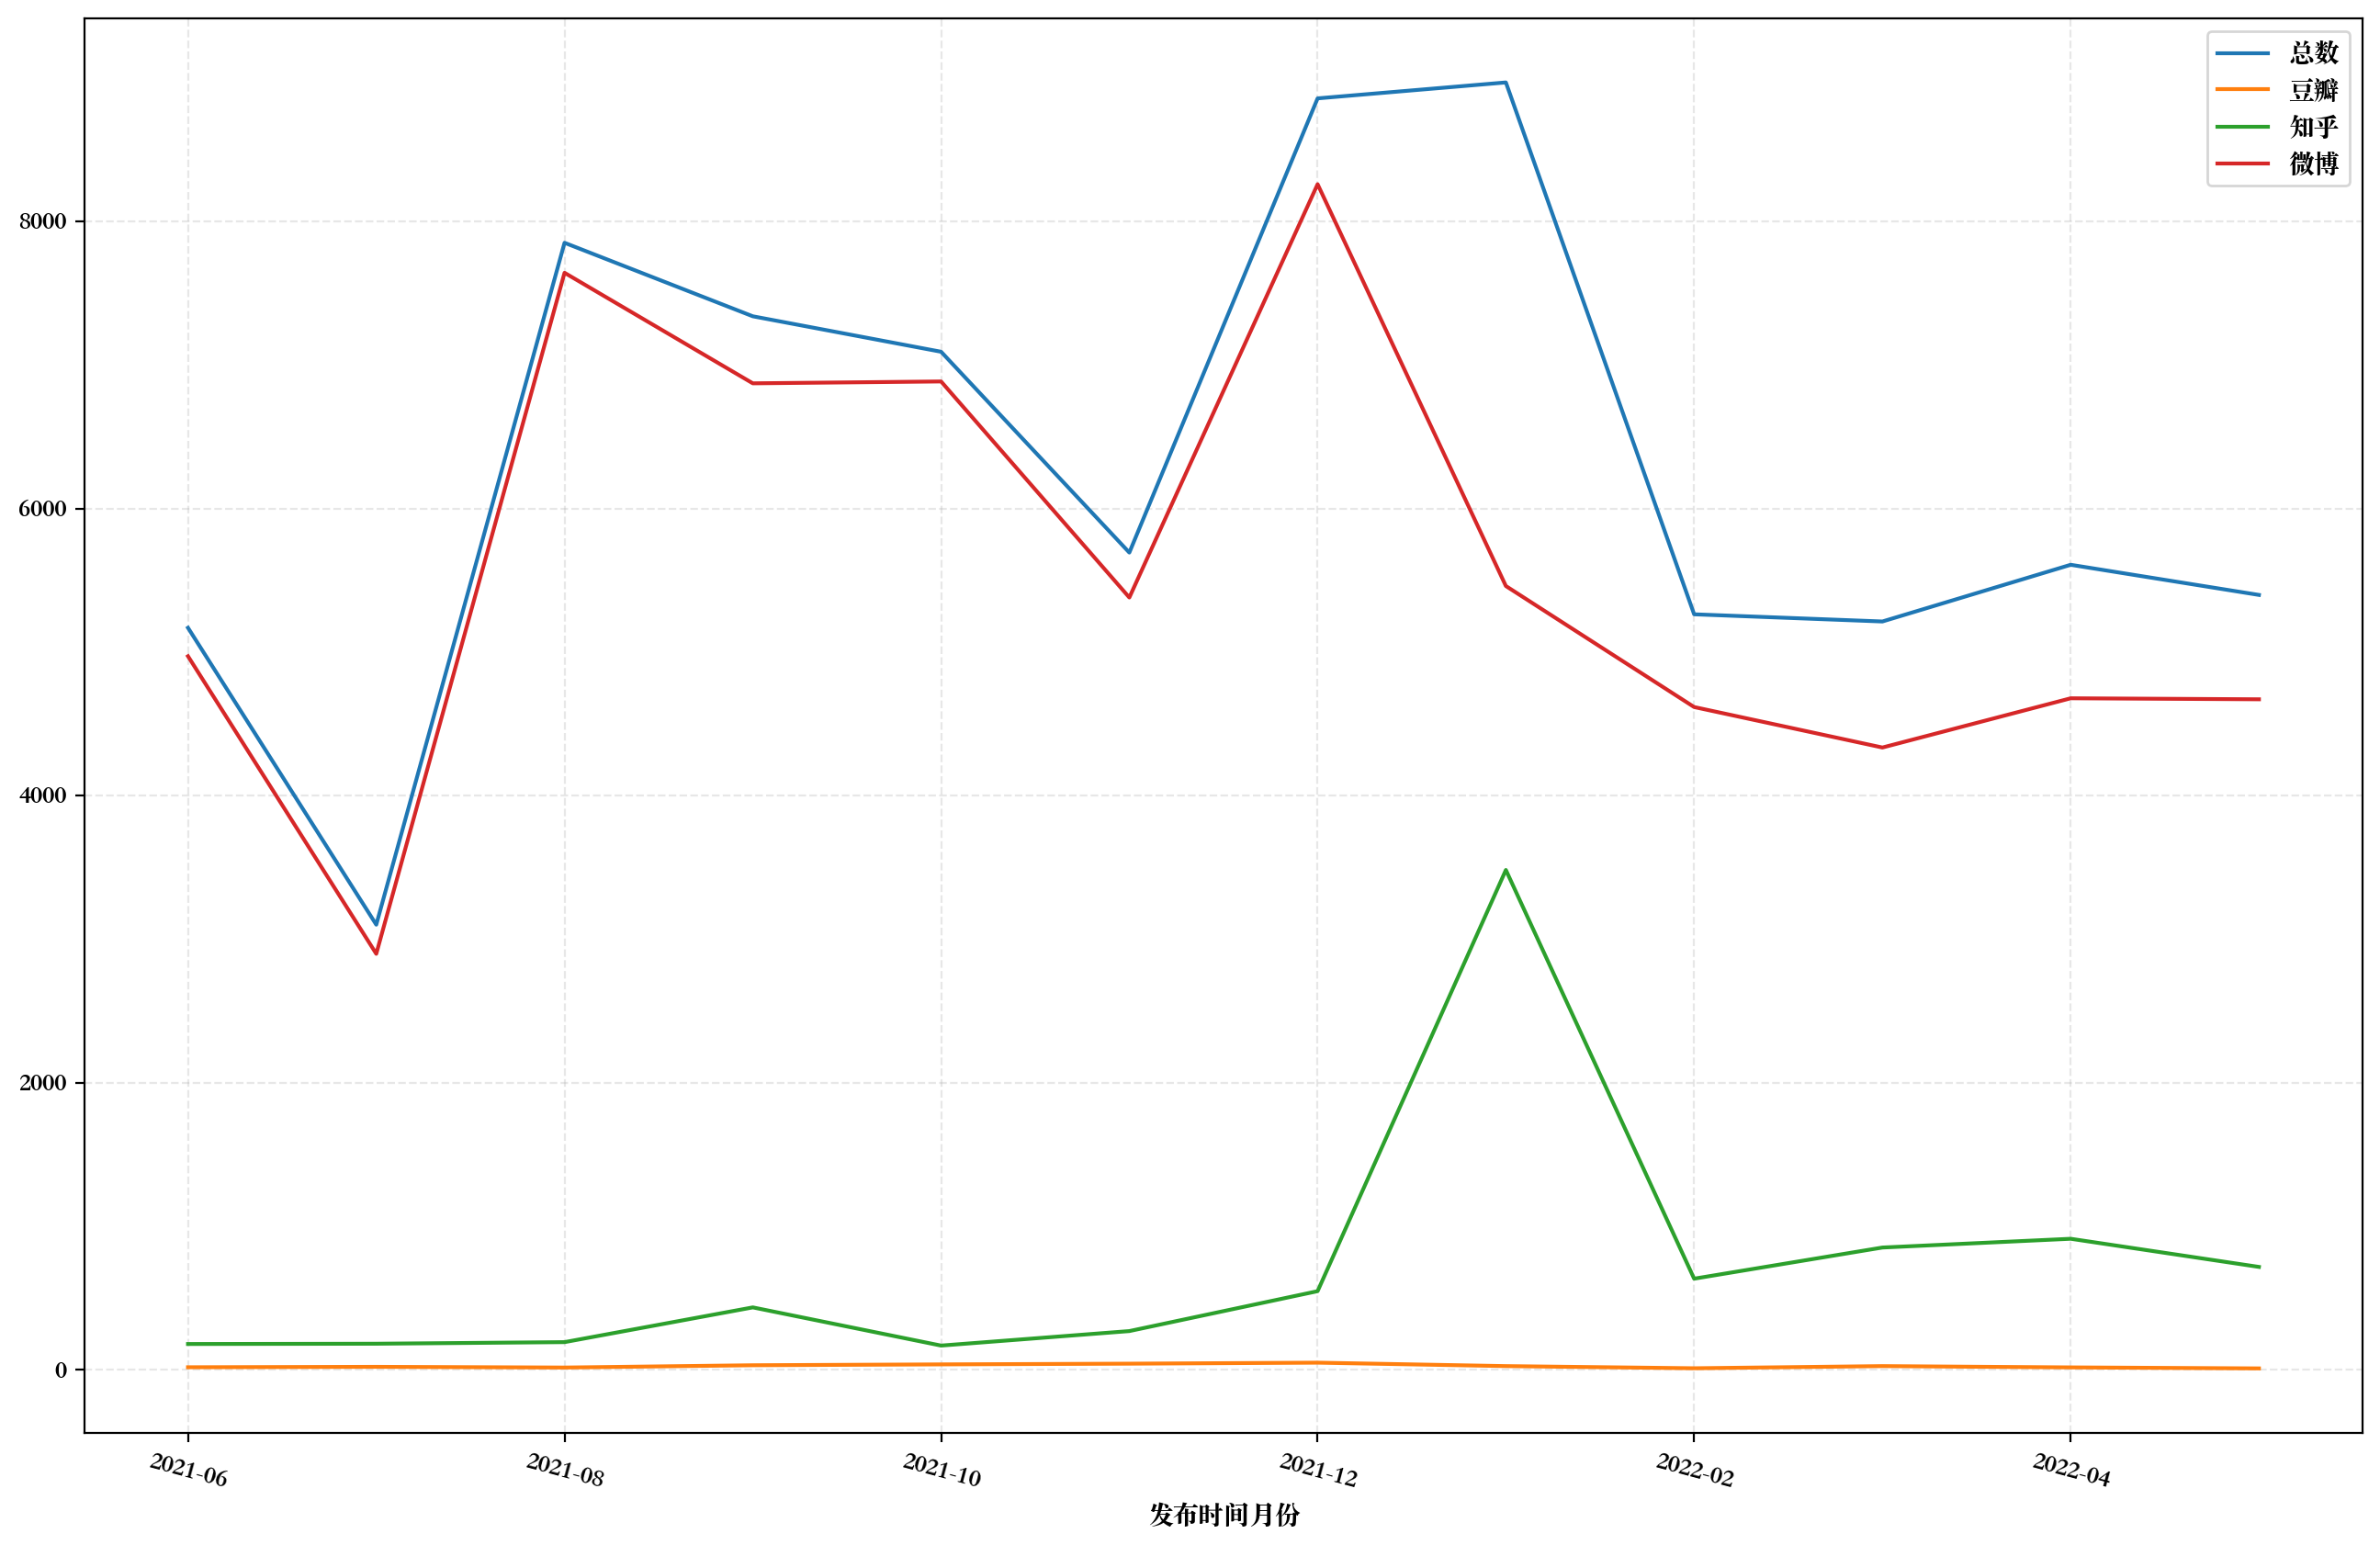

In [80]:
ax = dt.loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
plt.xticks(rotation=-15) 
plt.show()

#### 平台-点赞数时间分布统计

In [81]:
# 点赞统计（按月）
data_vote_count = pd.DataFrame()
data_vote_count['总数'] = get_app_sum_counts(data, '发布时间月份')
for app_name in ['豆瓣','知乎','微博']:
    data_vote_count[app_name] = get_app_sum_counts(data, '发布时间月份', app_name=app_name)
data_vote_count = data_vote_count.fillna(0)

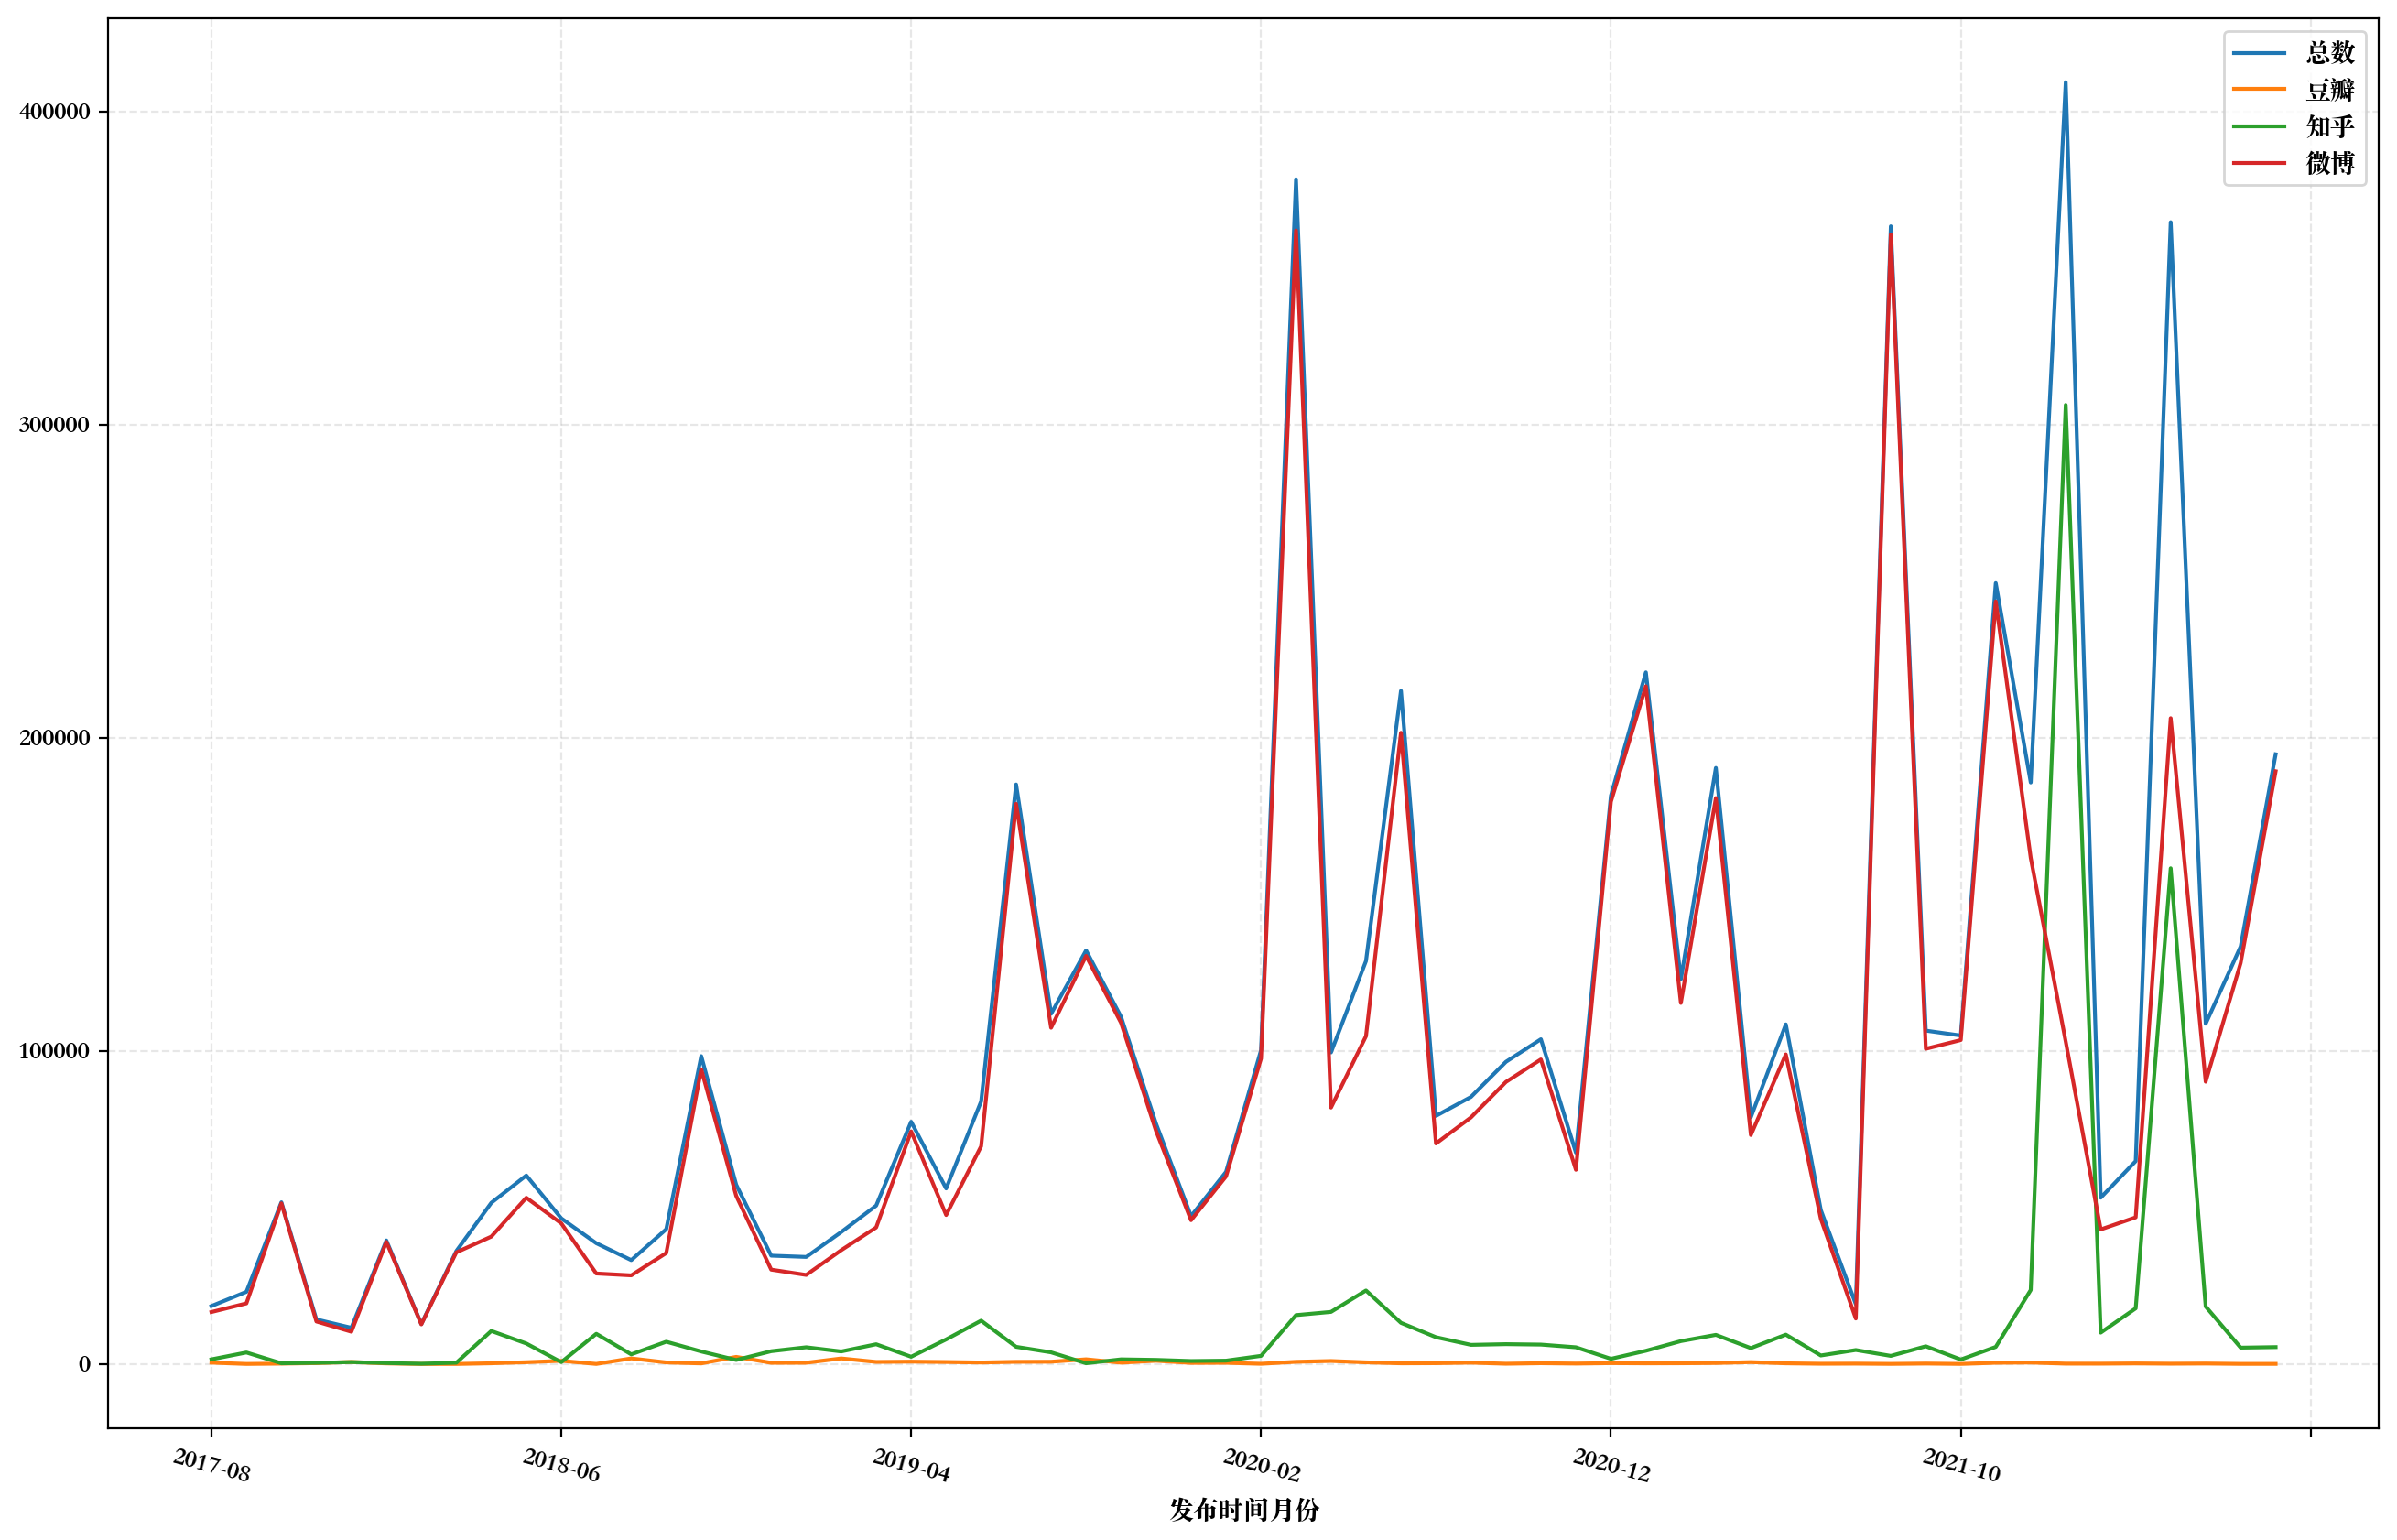

In [82]:
ax = data_vote_count.loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
plt.xticks(rotation=-15) 
plt.show()

#### 不同平台点赞分布

In [84]:
app_data = data[['点赞数', '平台']]
weibo = app_data[app_data['平台'] == '微博'].sample(1170)
zhihu = app_data[app_data['平台'] == '知乎'].sample(1170)
douban = app_data[app_data['平台'] == '豆瓣']
app_data = pd.concat([zhihu, weibo, douban])

In [86]:
# 点赞数区间分割
bins=[0,2,5,10,20,30,40,50,60,70,80,90,100,120,150,200,500,1000,5000,10000,100000]
segments=pd.cut(data['点赞数'],bins,right=False)
seg_weibo = pd.cut(weibo['点赞数'],bins,right=False)
seg_zhihu = pd.cut(zhihu['点赞数'],bins,right=False)
seg_douban = pd.cut(douban['点赞数'],bins,right=False)

In [87]:
# 点赞统计
vote_counts=pd.value_counts(segments,sort=False)
vote_counts_weibo=pd.value_counts(seg_weibo,sort=False)
vote_counts_zhihu=pd.value_counts(seg_zhihu,sort=False)
vote_counts_douban=pd.value_counts(seg_douban,sort=False)

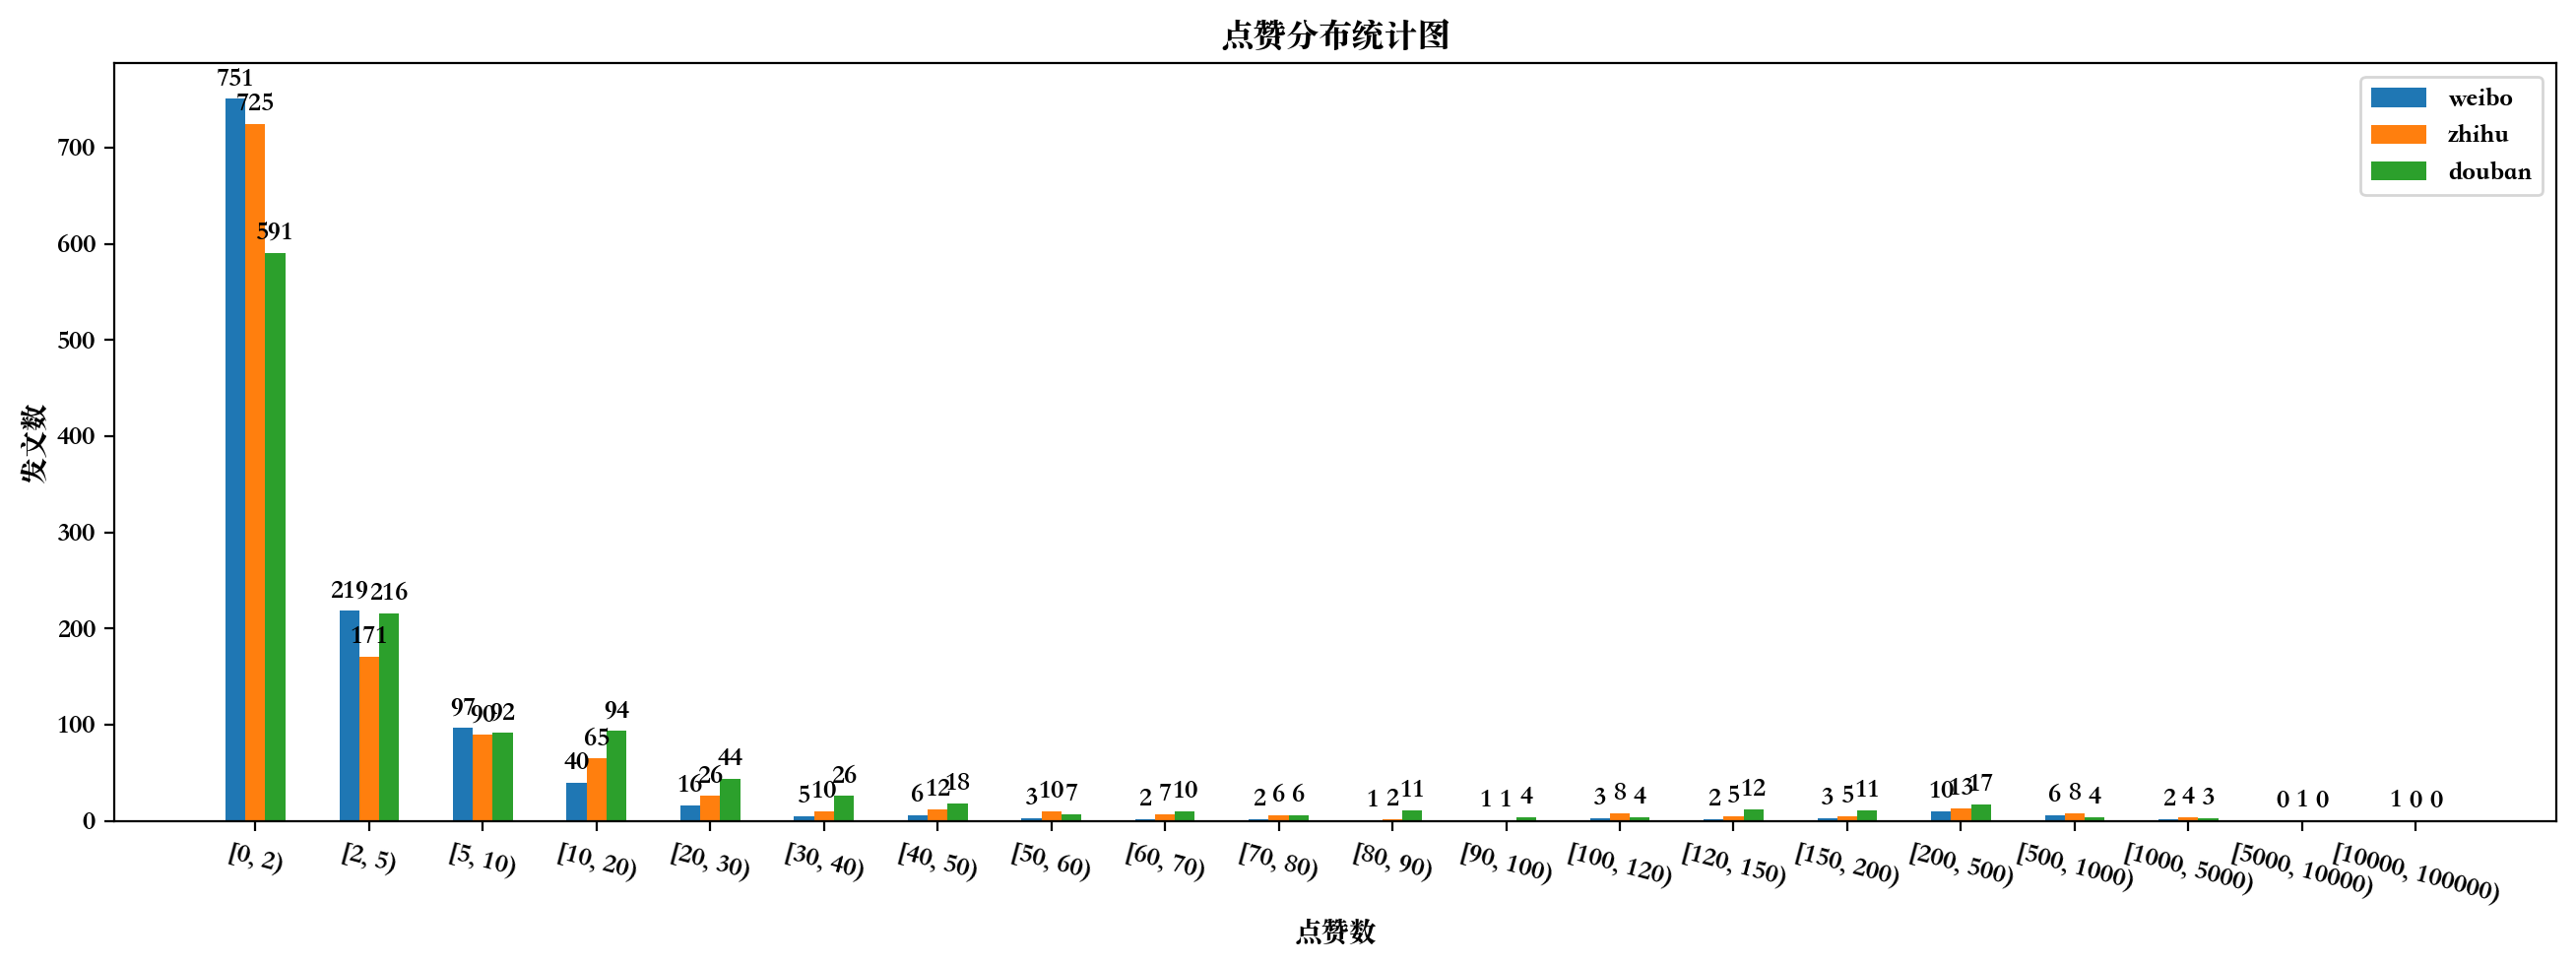

In [88]:
fig, ax = plt.subplots(figsize=(16, 5))
x = np.arange(len(vote_counts.index))
width = 0.35
weibo_bar = ax.bar(x - width/2, vote_counts_weibo, width/2, label='weibo')
zhihu_bar = ax.bar(x, vote_counts_zhihu, width/2, label='zhihu')
douban_bar = ax.bar(x + width/2, vote_counts_douban, width/2, label='douban')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(vote_counts.index.astype(str))
ax.set_xlabel('点赞数')
ax.set_ylabel('发文数')
ax.set_title('点赞分布统计图')
auto_label(douban_bar, ax)
auto_label(zhihu_bar, ax)
auto_label(weibo_bar, ax)
plt.xticks(rotation=-15)    # 设置x轴标签旋转角度
plt.show()

## 数据保存

In [ ]:
# data.to_pickle(get_new_path(DataFilePath,'时间分割'))